# Data Manipulation Steps 

Firstly the required libraries are imported and the relevant data file is downloaded. 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import logit
%matplotlib inline

In [69]:
data1 = pd.read_stata("CivilResistance/WCRWreplication.dta", convert_dates=True, convert_categoricals=True, index_col=None, convert_missing=False, preserve_dtypes=True, columns=None, order_categoricals=True, chunksize=None, iterator=False)
data1.head()

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


# Question 1: Frequency of Nonviolent and Violent Campaign End Years

The violent (violentDto) and non-violent (nonViolentDto) campaigns are firstly counted based on the 'eyear' column and are combined in one dataframe (dt_final). Then in this dataframe by using the 'eyear' column the decade to which each row is referring to is extracted after having added the relevant column (decade). 
In the end we again count the violent (grouped_violent_campaigns) and non-violent (grouped_nonviolent_campaigns) campaigns based on the 'decade' column and combine them in one dataframe (campaigns_per_decade) where the total number of violent and non-violent campaigns is presented per decade. 

In [70]:
# Perform the necessary calculations

violentDto = data1.loc[data1['viol'] == 1, ['eyear']].groupby('eyear').size().to_frame('count_of_violent').reset_index()
nonViolentDto = data1.loc[data1['viol'] == 0, ['eyear']].groupby('eyear').size().to_frame('count_of_non_violent').reset_index()
dt_violentDto = pd.DataFrame(violentDto)
dt_violentDto.sort_values(by='eyear', ascending=True)
dt_nonViolentDto = pd.DataFrame(nonViolentDto)
dt_nonViolentDto.sort_values(by='eyear', ascending=True)

# Merge data using outer to keep all data per year and count columns
final = dt_violentDto.merge(dt_nonViolentDto, on="eyear", how = 'outer')
# The rows with NaN values are removed 
final['count_of_non_violent'] = final['count_of_non_violent'].replace(np.nan, 0)
final['count_of_violent'] = final['count_of_violent'].replace(np.nan, 0)
final.sort_values(by = 'eyear', ascending = True)
final.count_of_non_violent = final.count_of_non_violent.astype(int)
final.count_of_violent = final.count_of_violent.astype(int)

# Create a dataframe based on the data of 'final' object 
dt_final = pd.DataFrame(final)
# Create empty column for decades
dt_final['decades'] = ""
# Calculate the decade per year row
dt_final['decade'] = (dt_final.eyear//10*10)

# Group by decade the violent campaigns to count them
grouped_violent_campaigns = dt_final.groupby('decade')['count_of_violent'].sum().reset_index()
# Group by decade the non-violent campaigns to count them
grouped_nonviolent_campaigns = dt_final.groupby('decade')['count_of_non_violent'].sum().reset_index()
# Merge again the above data to combine them in one dataframe
campaigns_per_decade = grouped_violent_campaigns.merge(grouped_nonviolent_campaigns, on="decade", how = 'outer')
campaigns_per_decade

,decade,count_of_violent,count_of_non_violent
0,1900,14,0
1,1910,8,1
2,1920,18,1
3,1930,14,1
4,1940,21,5
5,1950,19,9
6,1960,17,7
7,1970,26,7
8,1980,13,32
9,1990,45,23


Based on the data of 'campaigns_per_decade' dataframe, the requested stacked area chart is subsequently plotted.

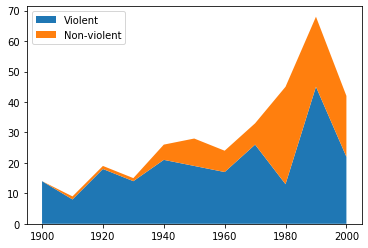

In [71]:
# Plot the stacked area chart

x = grouped_violent_campaigns.decade
y1=grouped_violent_campaigns.count_of_violent
y2=grouped_nonviolent_campaigns.count_of_non_violent
 
plt.stackplot(x, y1, y2, labels=['Violent','Non-violent'])
plt.legend(loc='upper left')
plt.show()

# Question 2: Number of Nonviolent Campaigns and Percentage of Success

Firstly only the non-violent campaigns (nonviolent_campaigns) are collected in one dataframe (dt_nonviolent_campaigns), the decade of each of them is calculated based on the 'eyear' column and in order to draw the requested plot only the non-violent campaigns that took place in 1940 or later are kept.  

In [72]:
# Perform the necessary calculations

# Extract the non-violent campaigns
nonviolent_campaigns = data1[data1['viol'] == 0] 
dt_nonviolent_campaigns = pd.DataFrame(nonviolent_campaigns)
# Extract the useful info about the non-violent campaigns
dt_nonviolent_campaigns = dt_nonviolent_campaigns[['campaign','eyear','success']]

# Extract decade per campaign
dt_nonviolent_campaigns['decade'] = (dt_nonviolent_campaigns.eyear//10*10)
# Extract only the campaigns for which the end decade is equal or greater than 1940
dt_nonviolent_campaigns = dt_nonviolent_campaigns[dt_nonviolent_campaigns['decade'] >= 1940]
dt_nonviolent_campaigns

,campaign,eyear,success,decade
2,,1985,1,1980
9,,2000,1,2000
10,,2006,0,2000
11,October Revolutionaries,1944,1,1940
17,Strike of Fallen Arms,1944,1,1940
18,,1981,0,1980
24,,1989,0,1980
29,,1958,1,1950
31,anti-coup,2002,1,2000
32,,1992,1,1990


After that the number of the successful non-violent campaigns is calculated for each decade (count_successful_nonviolent_campaigns). 

In [73]:
# Extract the successful non-violent campaigns per decade
successful_nonviolent_campaigns = dt_nonviolent_campaigns[dt_nonviolent_campaigns['success'] == 1]
count_successful_nonviolent_campaigns = successful_nonviolent_campaigns.groupby(['decade'])['campaign'].count().reset_index(name='no_success_campaigns')
count_successful_nonviolent_campaigns

,decade,no_success_campaigns
0,1940,2
1,1950,3
2,1960,3
3,1970,4
4,1980,17
5,1990,12
6,2000,14


Next the total number of the non-violent campaigns is calculated for each decade (count_all_nonviolent_campaigns). 

In [74]:
# Extract the total number of non-violent campaigns per decade
count_all_nonviolent_campaigns = dt_nonviolent_campaigns.groupby(['decade'])['campaign'].count().reset_index(name='total_no_campaigns')
count_all_nonviolent_campaigns

,decade,total_no_campaigns
0,1940,5
1,1950,9
2,1960,7
3,1970,7
4,1980,32
5,1990,23
6,2000,20


Finally the data of the above two objects are merged in one (merged_dataframes_nonviolent) and the percentage of the successful non-violent campaigns is calculated based on the data stored in this object.

In [75]:
# Calculate the percentage of the successful non-violent campaigns
merged_nonviolent = pd.merge(count_successful_nonviolent_campaigns, count_all_nonviolent_campaigns, on='decade')
merged_nonviolent['rate_nonviolent'] = (merged_nonviolent['no_success_campaigns']/merged_nonviolent['total_no_campaigns']).round(2)
merged_nonviolent.set_index("decade", drop=True, inplace=True)
merged_nonviolent

,no_success_campaigns,total_no_campaigns,rate_nonviolent
decade,,,
1940,2,5,0.40
1950,3,9,0.33
1960,3,7,0.43
1970,4,7,0.57
1980,17,32,0.53
1990,12,23,0.52
2000,14,20,0.70


Based on the data of 'merged_nonviolent' object, the requested plot is subsequently plotted.

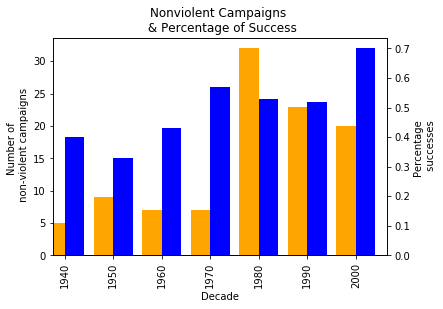

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax

width = 0.4
merged_nonviolent.total_no_campaigns.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
merged_nonviolent.rate_nonviolent.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of \n non-violent campaigns')
ax2.set_ylabel('Percentage \n successes')
ax.set_xlabel('Decade')
ax2.set_xlabel('Decade')

plt.title('Nonviolent Campaigns \n & Percentage of Success')
plt.show()

# Question 3: Success Rate by Decade

Firstly only the violent campaigns (violent_campaigns) are collected in one dataframe (dt_violent_campaigns), the decade of each of them is calculated based on the 'eyear' column and again n order to draw the requested plot only the violent campaigns that took place in 1940 or later are kept.  

In [77]:
# Perform the necessary calculations

# Extract the violent campaigns
violent_campaigns = data1[data1['viol'] == 1] 
dt_violent_campaigns = pd.DataFrame(violent_campaigns)
# Extract only the useful info about the violent campaigns
dt_violent_campaigns = dt_violent_campaigns[['campaign','eyear','success']]
# Extract decade per campaign
dt_violent_campaigns['decade'] = (dt_violent_campaigns.eyear//10*10)
# Extract only the campaigns for which the end decade is equal or greater than 1940
dt_violent_campaigns = dt_violent_campaigns[dt_violent_campaigns['decade'] >= 1940]
dt_violent_campaigns

,campaign,eyear,success,decade
0,Cuban Revolution,1959,1,1950
4,leftists,1965,0,1960
12,Conservative movement,1954,1,1950
13,Marxist rebels (URNG),1996,0,1990
14,Indian resistance,1972,0,1970
19,Farabundo Marti National Liberation Front (FMLN),1991,0,1990
21,FSLN,1979,0,1970
22,Contras,1990,0,1990
23,National Union Party,1948,1,1940
25,Conservative movement,1949,1,1940


After that the number of the successful violent campaigns is calculated for each decade (count_successful_violent_campaigns). 

In [78]:
# Extract the successful violent campaigns per decade
successful_violent_campaigns = dt_violent_campaigns[dt_violent_campaigns['success'] == 1]
count_successful_violent_campaigns = successful_violent_campaigns.groupby(['decade'])['campaign'].count().reset_index(name='no_success_campaigns')
count_successful_violent_campaigns

,decade,no_success_campaigns
0,1940,7
1,1950,7
2,1960,4
3,1970,10
4,1980,5
5,1990,12
6,2000,3


Next the total number of the violent campaigns is calculated for each decade (count_all_violent_campaigns). 

In [79]:
# Extract the total number of violent campaigns per decade
count_all_violent_campaigns = dt_violent_campaigns.groupby(['decade'])['campaign'].count().reset_index(name='total_no_campaigns')
count_all_violent_campaigns

,decade,total_no_campaigns
0,1940,21
1,1950,19
2,1960,17
3,1970,26
4,1980,13
5,1990,45
6,2000,22


Finally the data of the above two objects are merged in one (merged_violent) and the percentage of the successful violent campaigns is calculated based on the data stored this object. In order to create the requested plot, the data of the non-violent (Question 3 - merged_nonviolent) and violent campaigns (merged_violent) are also merged in one object (merged_violent_nonviolent). 

In [80]:
# Calculate the percentage of the successful violent campaigns
merged_violent = pd.merge(count_successful_violent_campaigns, count_all_violent_campaigns, on='decade')
merged_violent['rate_violent'] = (merged_violent['no_success_campaigns']/merged_violent['total_no_campaigns']).round(2)
merged_violent.set_index("decade", drop=True, inplace=True)
merged_violent

,no_success_campaigns,total_no_campaigns,rate_violent
decade,,,
1940,7,21,0.33
1950,7,19,0.37
1960,4,17,0.24
1970,10,26,0.38
1980,5,13,0.38
1990,12,45,0.27
2000,3,22,0.14


In [81]:
# Merge the info about the violent and non-violent campaigns
merged_violent_nonviolent = pd.merge(merged_nonviolent, merged_violent, on='decade')
merged_violent_nonviolent = merged_violent_nonviolent[['rate_nonviolent','rate_violent']]
merged_violent_nonviolent

,rate_nonviolent,rate_violent
decade,,
1940,0.40,0.33
1950,0.33,0.37
1960,0.43,0.24
1970,0.57,0.38
1980,0.53,0.38
1990,0.52,0.27
2000,0.70,0.14


Based on the data of 'merged_violent_nonviolent' object, the requested plot is subsequently plotted.

Text(0.5, 1.0, 'Success rate by decade')

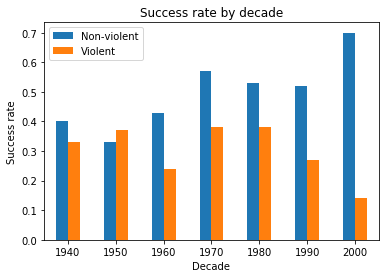

In [82]:
ax = merged_violent_nonviolent.plot.bar(rot=0)
ax.set_ylabel('Success rate')
ax.set_xlabel('Decade')
ax.legend(["Non-violent", "Violent"])
plt.title('Success rate by decade')

# Question 4: Twenty-Five Largest Resistance Campaigns (1900-2006)

The initial dataset is used (data1) to sort the rows by peakmembership, retrieve the first 25 rows and display for these top 25 campaigns the relevant information requested.  

In [83]:
top25 = data1.sort_values(by = 'peakmembership', ascending=False).head(25).reset_index()
top25 = top25[['peakmembership','byear','eyear','location','target','viol','success']]
top25

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945,China,Japanese occupation,1,0
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1
3,1000000.0,1988,1988,Burma,military junta,0,0
4,1000000.0,1989,1989,China,Communist regime,0,0
5,1000000.0,1967,1968,China,anti-Maoists,1,0
6,1000000.0,1922,1949,China,Kuomintang regime,1,1
7,1000000.0,2006,2006,Mexico,Calderon regime,0,0
8,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
9,1000000.0,1993,1999,Nigeria,Military rule,0,1


When searching for 'Greece', it is observed that our country is 17th in order on the list. 

In [84]:
top25.loc[top25['location'] == 'Greece']

,peakmembership,byear,eyear,location,target,viol,success
16,500000.0,1963,1963,Greece,Karamanlis regime,0,1


# Question 5: The Effect of Participation on the Probability of Campaign Success

In [85]:
# Run logistic regression

regr1 = logit("success ~ mempc + lnpop", data1).fit()
regr1.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2020-02-19 22:29 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

After performing logistic regression on the binary response variable of success, from the output represented in the above summary table we conclude that:
- One unit increase in membership per capita (*mempc*) results in an increase of 4.4892 in the log odds of having a successful campaign; equivalently, the odds ratio increases by 𝑒<sup>4.4892</sup> ≈ 89.0502 or about 88%.
- One unit increase in location’s logged population the year the campaign ends (*lnpop*) results in an increase of 0.0907 in the log odds of having a successful campaign; equivalently, the odds ratio increases by  𝑒<sup>0.0907</sup> ≈ 1.09494 or about 9%.
- The intercept is the log odds of having a successful campaign when all the independent variables are held at zero; that is 𝑒<sup>-5.8199</sup> ≈ 0.0029679. 
- The predictor variable of 'mempc' is **significant** for the determination of the campaign's success because its p-value is 0.0000. However, the p-value for 'lnpop' (*0.4803*) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.
- The Pseudo R-squared value is not high as it counts only to 0.129 indicating not a good fit for the logistic model.

After that in order to plot the requested diagram, the rows with NaN values in 'mempc' and 'lnpop' columns are removed in the initial dataframe (data1). Then the probabilities of success for the campaigns are subsequently calculated to draw the requested scatterplot. 

Text(0, 0.5, 'Probability of success')

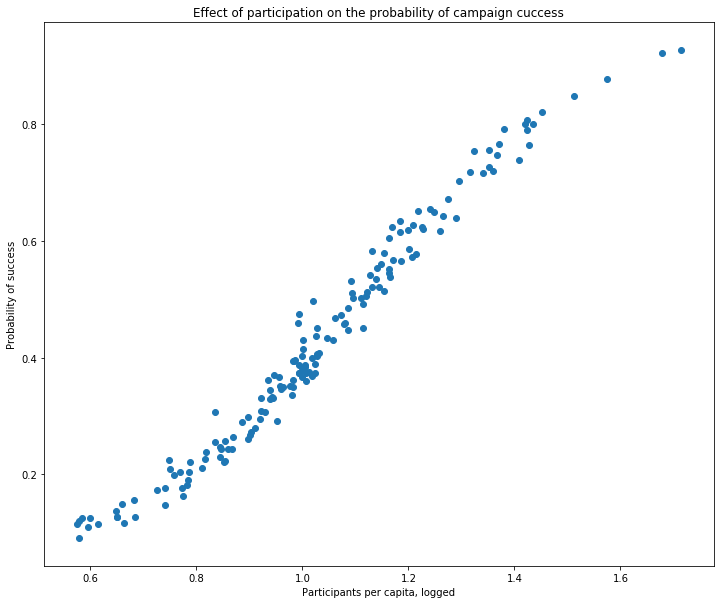

In [86]:
# Drop NA values from the rows of independent variables to draw the scatterplot
data1 = data1.dropna(subset=['mempc'])
data1 = data1.dropna(subset=['lnpop'])

# Plot the diagram
prediction = regr1.predict(transform=True)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(x=data1.mempc, y=prediction)
plt.title("Effect of participation on the probability of campaign cuccess")
plt.xlabel("Participants per capita, logged")
plt.ylabel("Probability of success")

# Question 6: The Level of Participation Tipping Point

In order to calculate the requested approximate tipping point, we use the data that were the input to create the scatterplot of question 5 (i.e. probabilities of success, participants per capita). 

We are actually searching for a point **(point_sel with coordinates y_sel, x_sel)** in this scatterplot that presents a relatively high and not "forbidden" probability of success for the campaign, i.e. *a probability that is equal or close to 0.5 (there is no meaning in searching for extremely high probabilities since the calculated tipping point for this case will be almost evident).* 

The coordinates for the points of the created scatterplot (x-y value pairs) are stored in one dataframe (dt_all_model_points) via which the x value (x_sel) for the selected point (point_sel) is found. 
After retrieving the coordinates of the selected point (point_sel) we proceed to the calculation of the population percentage (percentage) by considering that the max population that currectly exists in the data has probability around 1, which leads to an almost certain successful campaign with 100% participation.

Based on this, the tipping point is defined as the **division of the minimum as possible population (i.e. x_sel) to the max as possible population (x_max) needed for a successful campaign** which in our case counts to *64.79%*.

In [87]:
# Select a specific y value by randomly picking any probability close to 0.5
y = 0.5       
greater = [i for i in prediction if i >= y and i < 0.515]
y_sel = min(greater)
y_sel

0.5019047054317561

In [88]:
# Retrieve the pairs of x,y values of the scatterplot
all_plot_points = scatter.get_offsets()
# Store these values in one dataframe
all_plot_points = pd.DataFrame(all_plot_points, columns=list('xy'))
all_plot_points.head(20)

,x,y
0,1.226839,0.619573
1,1.200712,0.586438
2,1.001202,0.429948
3,0.741234,0.146914
4,0.784924,0.189858
5,1.023090,0.388029
6,1.017789,0.368846
7,1.165337,0.537911
8,0.774153,0.162136
9,0.844079,0.229049


In [89]:
# Retrieve the x value for the given y value
point_sel = all_plot_points.loc[all_plot_points['y'] == y_sel]
x_sel = point_sel.x
point_sel

,x,y
107,1.110516,0.501905


In [90]:
# Calculate the percentage as the portion of the minimum population required for successful campaign to the total population 
x_max = all_plot_points.x.max()
x_max

1.713916540145874

In [91]:
percentage = ((x_sel/x_max) * 100).round(2).to_frame(name='Percentage')
percentage

,Percentage
107,64.79


# Question 7: Nonviolent Resistance, Target Regime Type, Geographical Location

We run the logistic regression on the binary response of success with the independent variables to be tpolity, lmembers, lnpop and nonviol, as indicated below.

In [67]:
#  7a: Nonviolent campaign and regime type

# Run logistic regression
regr2 = logit("success ~ tpolity + lmembers + lnpop + nonviol", data1).fit()
regr2.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2020-02-19 22:27 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
=================================================================

"""

From the output represented in the above summary table, we conclude that even if we control for the POLITY IV score of campaign target (*tpolity*), the log of peakmembership (*lmembers*) and the location’s logged population the year the campaign ends (*lnpop*), the nonviolence indicator (*nonviol*) is not statistically significant for the determination of a success for a campaign as its p-value is 0.0510, slightly greater than the common alpha level of 0.05.

We then run the logistic regression on the binary response of success with the independent variables to be nonviol, americas, asia, africa, europe and fsu (k-1 dummy variables selected - middleeast variable not included), as indicated below.

In [66]:
# 7b: Nonviolent campaign and geographical location 

# Run logistic regression by using k-1 dummy variables (categorical)
regr3 = logit("success ~ americas + asia + africa + europe + fsu + nonviol", data1).fit()
regr3.summary()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                 0.08320
Time:                        22:23:33   Log-Likelihood:                -191.12
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 4.950e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9729      0.474     -2.053      0.040      -1.902      -0.044
americas       0.2959      0.542      0.546      0.585      -0.766       1.358
asia          -0.5034      0.527     -0.956      0.339      -1.536       0.529
africa         0.2590      0.514      0.504      0.614      -0.748       1.266
europe        -0.2995      0.552     -0.542      0.588      -1.382       0.783
middleeast    -0.7645      0.628     -1.218      0.223      -1.995       0.466
nonviol        1.2582      0.265      4.751      0.000       0.739       1.777
==============================================================================
"""

From the output represented in the above summary table, we conclude that when we control for the geographical location of a campaign (*americas, asia, africa, europe and fsu*), the nonviolence indicator (*nonviol*) is statistically significant for the determination of a success for this campaign as its p-value is 0.000, quite lower than the common alpha level of 0.05.